In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# import os
# os.chdir('/content/gdrive/My Drive/computer_vision_cs682/human_pose_estimation')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Starting loading train images ... ...
Successfully loaded 22246 train images
torch.Size([3, 256, 256])
torch.Size([32])
(16, 2)
(1,)
tensor([-0.0391,  0.1445, -0.0352, -0.0547,  0.0352, -0.1914, -0.0820, -0.1875,
        -0.1055, -0.1328, -0.0977, -0.1172, -0.0234, -0.1875, -0.0820, -0.2070,
        -0.0664, -0.1836, -0.1602, -0.3164, -0.0156, -0.1406,  0.0664, -0.2305,
        -0.0078, -0.2188, -0.1562, -0.1914, -0.1562, -0.1016, -0.1484,  0.0156])
torch.Size([3, 256, 256])


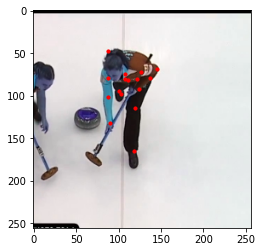

In [26]:
import os
import cv2
import matplotlib.pyplot as plt

from datasets.mpii import MPII

%matplotlib inline
%load_ext autoreload
%autoreload 2

mpii = MPII(split='train')
inp, target, meta1, meta2, inp_without_clip = mpii.__getitem__(0)
print(inp.shape)
print(target.shape)
print(meta1.shape)
print(meta2.shape)
print(target)

print(inp_without_clip.shape)
mpii.plot_back(inp_without_clip, target)
# t = (target + .5) * 256
# t = t.reshape(-1, 16, 2)
# t

Starting loading train images ... ...
Successfully loaded 22246 train images


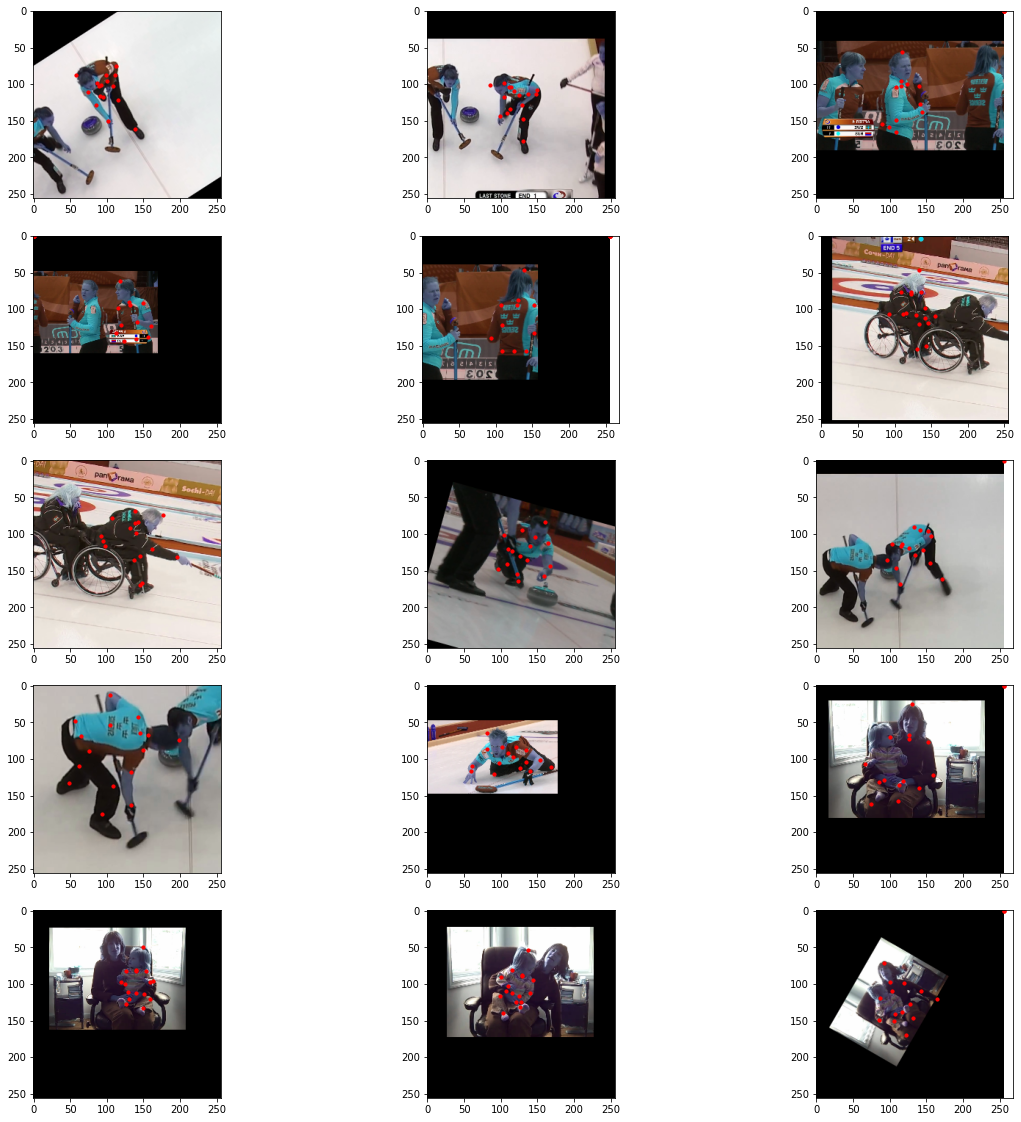

In [1]:
# draws computed image with converted points
from datasets.mpii import MPII
mpii = MPII(split='train')
img_list = []
pt_list = []
for i in range(15):
    _, target, _, _, img = mpii.__getitem__(i)
    img_list.append(img)
    pt_list.append(target)

mpii.plot_back_images(img_list, pt_list, cols=3)

Starting loading val images ... ...
Successfully loaded 2958 val images
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2


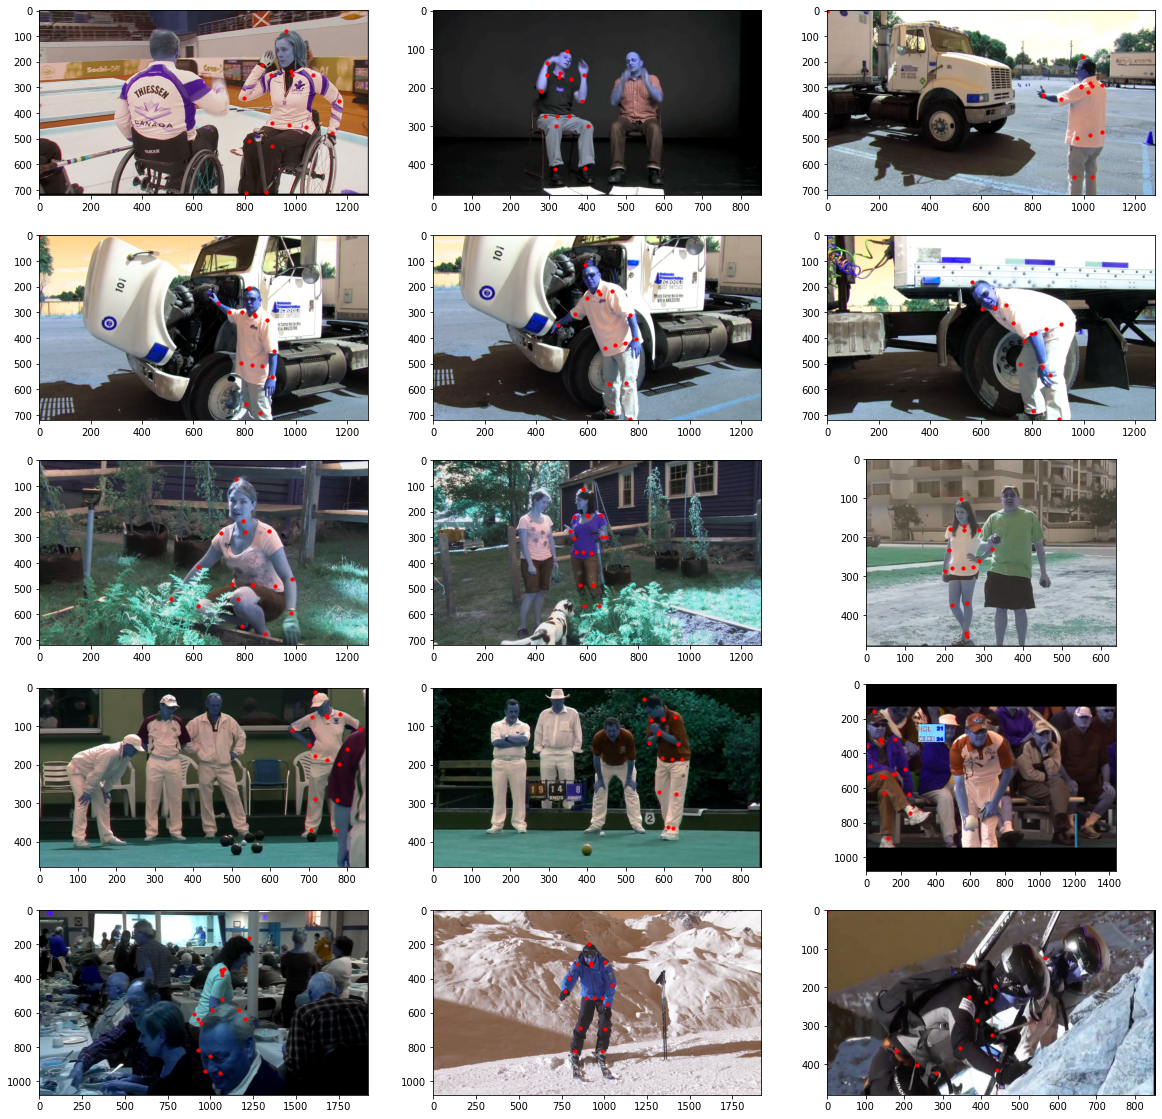

In [3]:
# draws raw image with raw points without any conversion
import utility 
# raw_img, raw_pts = mpii.get_raw(0)
# print(raw_pts.shape)
# print(raw_pts)
# print(raw_pts.reshape(-1))
from datasets.mpii import MPII
mpii = MPII(split='val')
img_list = []
pt_list = []
for i in range(15):
    raw_img, raw_pts = mpii.get_raw(i)
    img_list.append(raw_img)
    pt_list.append(raw_pts)

utility.plot_image_with_points(img_list, pt_list, cols=3)

array([394., 269., 185., 188., 221., 231., 187., 176., 189., 108., 217.,
       161., 167., 185., 240., 313.])

In [27]:
from tqdm import tqdm_notebook as tqdm
for i in tqdm(range(10000)):
#     print(i)
    pass

/media/akabir/New Volume/python3_venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [26]:
import numpy as np
np.ones(3)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
import torch
import torch.nn.functional as F
input = torch.ones((3, 3))
target = torch.eye(3)
print(input, target)
F.binary_cross_entropy(input, target, reduction='sum')

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


tensor(165.7861)

In [1]:
from models.deeppose import Deeppose
model = Deeppose()
path = "output_models/best_model.pth"
model.load_state_dict(torch.load(path))

val_dataset = MPII(split='val')
val_loader = DataLoader(val_dataset, batch_size=40, shuffle=True)

In [4]:
lrs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-5]
for nth_run, init_lr in enumerate(lrs):
    print('output_models/best_model_2{}.pth'.format(nth_run))

output_models/best_model_20.pth
output_models/best_model_21.pth
output_models/best_model_22.pth
output_models/best_model_23.pth
output_models/best_model_24.pth
